# 名震江南的树模型的树状图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

plt.rcParams["font.sans-serif"] = ["SimHei"]
#plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [2]:
df = pd.read_excel('赛题附件\\附件1.xlsx')
df.head()

,受试者编号,研究开始时间,研究结束时间,性别,年龄,身高,体重,ASA,有无手术史,手术说明,...,如果有，那么是出现了腹腹痛,如果有，那么是出现了腹都有,有没出现腹胀腹痛的情况呢无,还有没其他不舒服的情况呢有,还有没其他不舒服的情况呢无,术后24内患者的满意度评价非常满意,术后24内患者的满意度评价满意,术后24内患者的满意度评价一般,术后24内患者的满意度评价不满意,术后24内患者的满意度评价非常不满意
0,1,2020-11-26,2020-11-26,女,72.0,158,50.0,Ⅱ级,无,NaN,...,NaN,NaN,是,NaN,是,是,NaN,NaN,NaN,NaN
1,2,2020-11-26,2020-11-26,女,61.0,159,70.0,Ⅱ级,无,NaN,...,NaN,NaN,是,NaN,是,NaN,是,NaN,NaN,NaN
2,3,2020-11-27,2020-11-27,男,58.0,169,83.0,Ⅱ级,无,NaN,...,NaN,NaN,是,NaN,是,NaN,是,NaN,NaN,NaN
3,4,2020-11-27,2020-11-27,女,65.0,154,60.0,Ⅱ级,无,NaN,...,NaN,NaN,是,NaN,是,NaN,NaN,是,NaN,NaN
4,5,2020-11-27,2020-11-27,女,55.0,160,60.0,Ⅱ级,无,NaN,...,NaN,NaN,是,NaN,是,NaN,是,NaN,NaN,NaN


In [3]:
# 使用 pandas 的 apply 函数将评级转换为数字
def get_rating(row):
    if row['术后24内患者的满意度评价非常满意'] == '是':
        return 5
    elif row['术后24内患者的满意度评价满意'] == '是':
        return 4
    elif row['术后24内患者的满意度评价一般'] == '是':
        return 3
    elif row['术后24内患者的满意度评价不满意'] == '是':
        return 2
    elif row['术后24内患者的满意度评价非常不满意'] == '是':
        return 1

df['rating'] = df.apply(get_rating, axis=1)


In [4]:
# (df.isnull().sum()).to_excel('探索信息\\第四题缺失值.xlsx')

In [5]:
df1 = df.drop(['手术说明','既往史说明','镇静追加次数','镇静药追加剂量','镇静追加2','镇静追加3','镇静追加4',
        '受试者编号','研究开始时间','研究结束时间','ASA','有无PONV','有无晕动史','镇痛药诱导剂量',
        '镇痛追加次数','镇痛药追加剂量','sbp005','dbp005','sbp015','dbp015','sbp025','dbp025',
        'sbp10','dbp10','petco210','RR10','spo210','HR10','IPI10','moaas10','sbp15','dbp15',
        'petco215','RR15','spo215','HR15','IPI15','moaas15','sbp20','dbp20','petco220','RR20',
        'spo220','HR20','IPI20','moaas20','IPI达到4分时间','术中其他程度','是否出现了恶心呕吐的情况是',
        '如果有，那么是出现了恶恶心','如果有，那么是出现了恶呕吐','如果有，那么是出现了恶都有',
        '如果有，那么是出现了恶呕吐次数','是否出现了头晕头昏头痛是','如果有，那么是出现了头头晕',
        '如果有，那么是出现了头头昏','如果有，那么是出现了头头痛','如果有，那么是出现了头都有',
        '有没出现嗜睡乏力的情况呢有','如果有，那么是出现了嗜嗜睡','如果有，那么是出现了嗜乏力',
        '如果有，那么是出现了嗜都有','有没出现腹胀腹痛的情况呢有','如果有，那么是出现了腹腹胀',
        '如果有，那么是出现了腹腹痛','如果有，那么是出现了腹都有','还有没其他不舒服的情况呢有',
        '术后24内患者的满意度评价非常满意','术后24内患者的满意度评价满意','术后24内患者的满意度评价一般',
        '术后24内患者的满意度评价不满意','术后24内患者的满意度评价非常不满意',
        'IPI达到4分时间','IPI最低值','开始给药时间','进镜时间','出镜时间','最后一次给药时间',
        '睁眼时间','出PACU','是否出现了恶心呕吐的情况否', '是否出现了头晕头昏头痛否',
       '有没出现嗜睡乏力的情况呢无', '有没出现腹胀腹痛的情况呢无', '还有没其他不舒服的情况呢无'], axis=1)

# 直接删掉含有缺失值的单位
df1 = df1.dropna()

In [6]:
df1.shape

(671, 102)

<Axes: xlabel='rating', ylabel='count'>

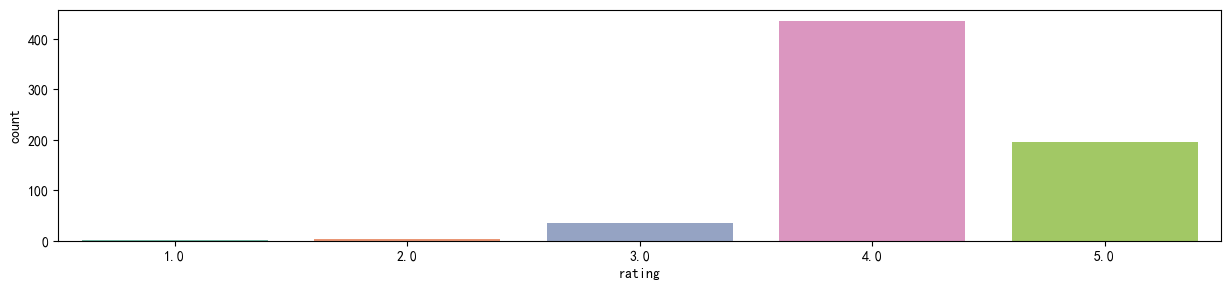

In [7]:
plt.figure(figsize=(15, 3))
sns.countplot(x='rating', palette='Set2', data = df1)


## 数据预处理

In [8]:
df1["性别"] = df1["性别"].map({"男": 1, "女": 0})
df1["有无手术史"] = df1["有无手术史"].map({"有": 1, "无": 0})
df1["有无既往史"] = df1["有无既往史"].map({"有": 1, "无": 0})
df1["是否吸烟"] = df1["是否吸烟"].map({"偶尔吸烟者：每周吸卷烟超过4次，但平均每天不足1支": 1, "从未吸烟者": 0, "经常吸烟者：每天吸卷烟1支以上，连续或累计6个月": 1})
df1["是否酗酒"] = df1["是否酗酒"].map({"有": 1, "无": 0})
df1["镇静药名称"] = df1["镇静药名称"].map({"B药": 1, "R药": 0})
df1["镇静药诱导剂量"] = df1["镇静药诱导剂量"].map({"1.5mg/kg": 1, "0.15mg/kg": 0})
df1["有无追加镇静"] = df1["有无追加镇静"].map({"有": 1, "无": 0})
df1["有无追加镇痛"] = df1["有无追加镇痛"].map({"有": 1, "无": 0})
df1["呛咳"] = df1["呛咳"].map({"有": 1, "无": 0})
df1["体动"] = df1["体动"].map({"有": 1, "无": 0})
df1["术中其他"] = df1["术中其他"].map({"有": 1, "无": 0})
df1["麻醉医生满意度"] = df1["麻醉医生满意度"].map({"5分": 5, "6分": 6, "7分": 7, "8分": 8, "9分": 9, "10分": 10})
df1["内镜医生满意度"] = df1["内镜医生满意度"].map({"5分": 5, "6分": 6, "7分": 7, "8分": 8, "9分": 9, "10分": 10})

In [9]:
# 数据归一化
model = MinMaxScaler()
df1[["年龄", "身高", "体重",'镇痛药总剂量','sbp00','dbp00','petco200','RR00','spo200','HR00',
    'IPI00','moaas00','petco2005','RR005','spo2005','HR005','IPI005',
    'moaas005','sbp1','dbp1','petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing',
    'dbpjinjing','petco2jinjing','RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing',
    'petco2015','RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2',
    'petco22','RR2','spo22','HR2','IPI2','moaas2','petco2025','RR025',
    'spo2025','HR025','IPI025','moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3',
    'moaas3','sbp5','dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu','dbpjieshu',
    'petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu','moaasjieshu']] = \
        model.fit_transform(df1[["年龄", "身高", "体重",'镇痛药总剂量','sbp00','dbp00','petco200','RR00','spo200','HR00',
    'IPI00','moaas00','petco2005','RR005','spo2005','HR005','IPI005',
    'moaas005','sbp1','dbp1','petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing',
    'dbpjinjing','petco2jinjing','RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing',
    'petco2015','RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2',
    'petco22','RR2','spo22','HR2','IPI2','moaas2','petco2025','RR025',
    'spo2025','HR025','IPI025','moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3',
    'moaas3','sbp5','dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu','dbpjieshu',
    'petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu','moaasjieshu']])

In [10]:
df2 = df1[["年龄", "身高", "体重",'镇痛药总剂量','sbp00','dbp00','petco200','RR00','spo200','HR00',
    'IPI00','moaas00','petco2005','RR005','spo2005','HR005','IPI005',
    'moaas005','sbp1','dbp1','petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing',
    'dbpjinjing','petco2jinjing','RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing',
    'petco2015','RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2',
    'petco22','RR2','spo22','HR2','IPI2','moaas2','petco2025','RR025',
    'spo2025','HR025','IPI025','moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3',
    'moaas3','sbp5','dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu','dbpjieshu',
    'petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu','moaasjieshu', 'rating']]

df3 = df1.drop(["年龄", "身高", "体重",'镇痛药总剂量','sbp00','dbp00','petco200','RR00','spo200','HR00',
    'IPI00','moaas00','petco2005','RR005','spo2005','HR005','IPI005',
    'moaas005','sbp1','dbp1','petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing',
    'dbpjinjing','petco2jinjing','RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing',
    'petco2015','RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2',
    'petco22','RR2','spo22','HR2','IPI2','moaas2','petco2025','RR025',
    'spo2025','HR025','IPI025','moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3',
    'moaas3','sbp5','dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu','dbpjieshu',
    'petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu','moaasjieshu'], axis=1)

In [11]:
# df为数据集，label为指定的标签名称，method为pearson、spearman或kendall
corr_series1 = np.array(df2.corrwith(df2["rating"], method="spearman").reset_index())
corr_series2 = np.array(df3.corrwith(df3["rating"], method="kendall").reset_index())


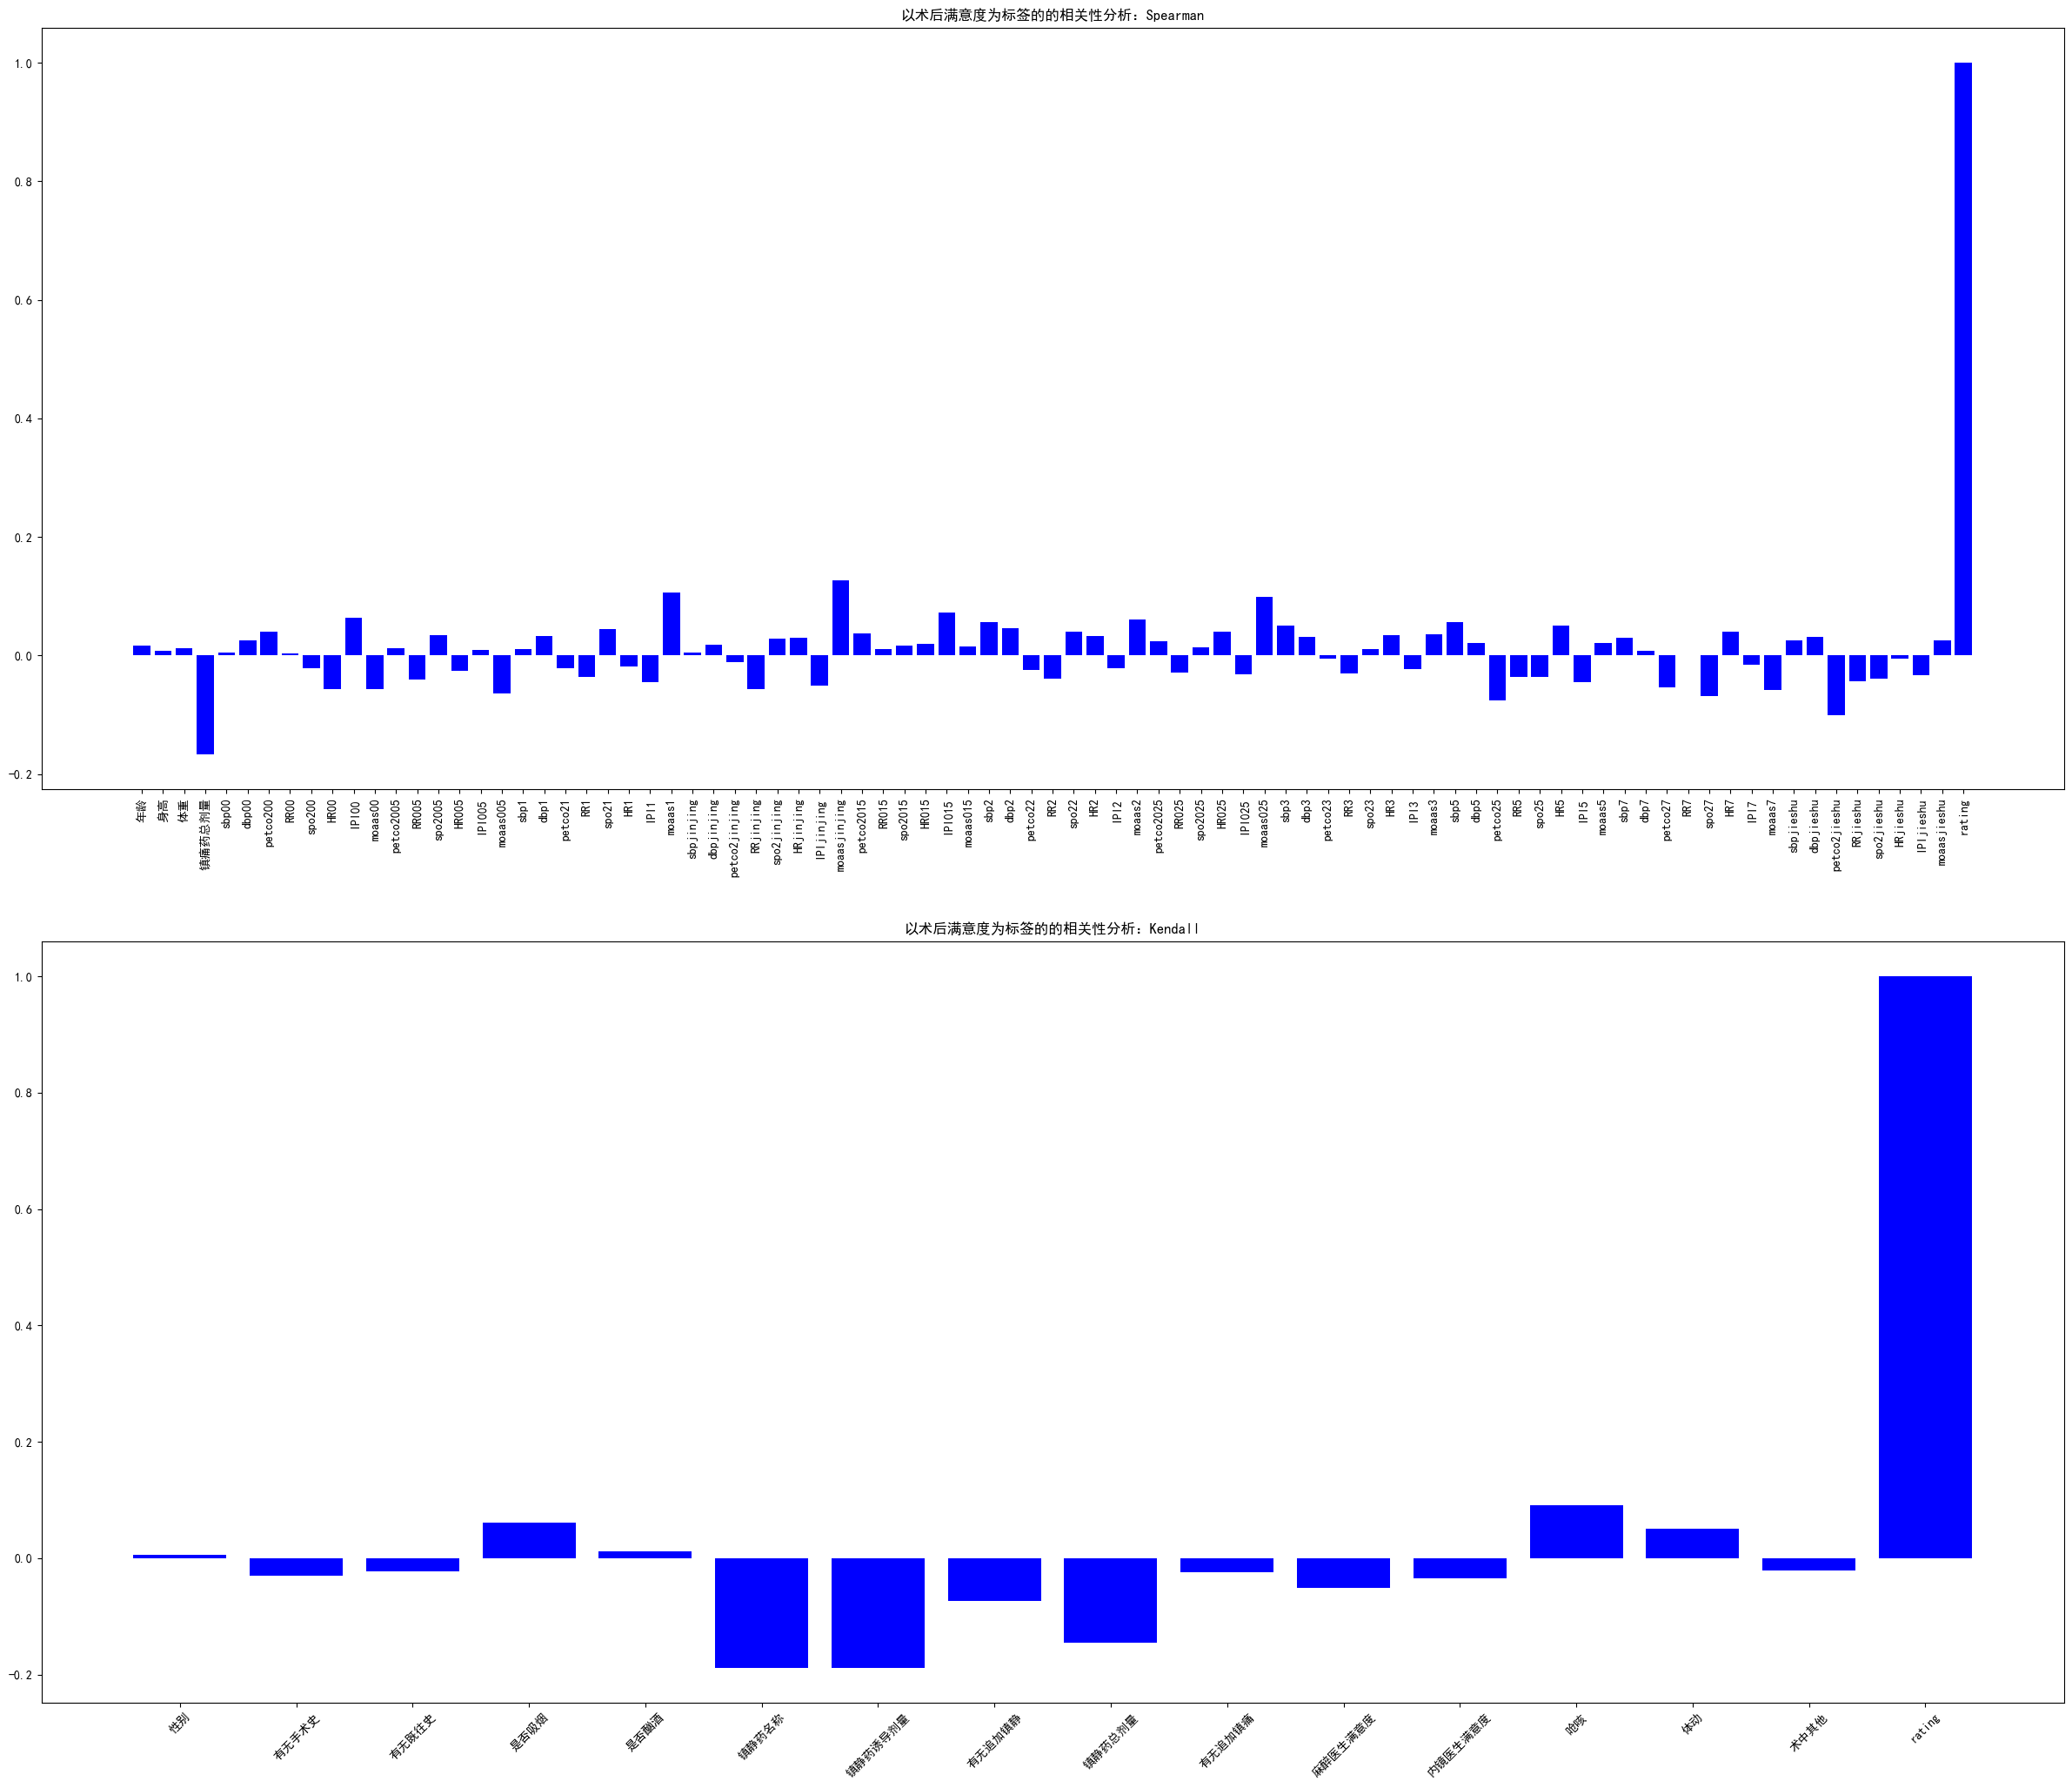

In [12]:
plt.figure(figsize=(30, 25))

plt.subplot(2, 1, 1)
plt.bar(corr_series1[:, 0], corr_series1[:, 1], align='center', color='blue')
plt.xticks(rotation=90)
plt.title("以术后满意度为标签的的相关性分析：Spearman")
plt.subplot(2, 1, 2)
plt.bar(corr_series2[:, 0], corr_series2[:, 1], align='center', color='blue')
plt.xticks(rotation=45)
plt.title("以术后满意度为标签的的相关性分析：Kendall")
plt.show()

## 换个角度

In [13]:
X = df1.drop("rating", axis=1)
y = df1.rating

# 创建上采样对象
ros = RandomOverSampler(random_state=42)
# 对数据进行上采样
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [14]:
Model = RandomForestClassifier(max_depth=3, n_estimators=1000)
y_pred = Model.fit(X_train, y_train).predict(X_test)

# 打印分类模型最好的评价系统
print("评估数据结果打印:\n", classification_report(y_test, y_pred))

评估数据结果打印:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        91
         2.0       0.95      1.00      0.98        83
         3.0       0.61      1.00      0.76        76
         4.0       0.56      0.20      0.30        89
         5.0       0.56      0.59      0.57        97

    accuracy                           0.75       436
   macro avg       0.74      0.76      0.72       436
weighted avg       0.74      0.75      0.72       436



In [15]:
plt.figure(figsize=(50, 20), dpi=300)
estimator = Model.estimators_[5]
estimator.fit(X_train, y_train)
plot_tree(estimator, filled=True, max_depth=3,feature_names=X.columns, fontsize=22)

plt.title("随机森林分类树状图", fontsize=30)
plt.show()